# The South German dataset
Machine learning on the south german dataset availble from> https://archive.ics.uci.edu/ml/datasets/South+German+Credit+%28UPDATE%29
Data description availble here ....

In [1]:

# Importing necessary libaries, if you cant import them try to pip install them first. 
try: 
    import pandas as pd
except:
    print('installing pandas')
    !pip install pandas==0.25.1
    import pandas as pd

try:
    import numpy as np
except:
    print('installing numpy')
    !pip install numpy==1.19.5
    import numpy as np
try:
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
except:
    print('Installing matplot')
    !pip install matplot==3.1.1
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    
try:
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import cross_val_predict, cross_val_score,KFold, RepeatedStratifiedKFold
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import RandomizedSearchCV
    from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
    from sklearn.neural_network import MLPClassifier
except:
    print('installing scikit-learn')
    !pip install scikit-learn==0.24.2 
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import cross_val_predict, cross_val_score,KFold, RepeatedStratifiedKFold
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import RandomizedSearchCV
    from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
    from sklearn.neural_network import MLPClassifier

try:
    from scipy.stats import randint
except:
    print('Installing scipy')
    !pip install scipy==1.3.1
    from scipy.stats import randint





In [2]:
#Loading the datasets
train_credit = pd.read_csv(r'SouthGermanCredit/train.csv')
test_credit = pd.read_csv(r'SouthGermanCredit/test.csv') 
train_credit.head()
print(len(train_credit.Id))
print(len(test_credit.Id))

800
200


In [3]:
#Giving the dataset english names to better understand what it consists of
train_credit.columns = ['Id','status', 'duration', 'credit_history', 'purpose', 'amount', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'age', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker', 'credit_risk']
test_credit.columns =  ['Id','status', 'duration', 'credit_history', 'purpose', 'amount', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'age', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker']

train_credit.head()

,Id,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,0,1,18,4,2,1049,1,2,4,2,...,2,21,3,1,1,3,2,1,2,1
1,1,1,9,4,0,2799,1,3,2,3,...,1,36,3,1,2,3,1,1,2,1
2,2,2,12,2,9,841,2,4,2,2,...,1,23,3,1,1,2,2,1,2,1
3,3,1,12,4,0,2122,1,3,3,3,...,1,39,3,1,2,2,1,1,1,1
4,5,1,10,4,0,2241,1,2,1,3,...,1,48,3,1,2,2,1,1,1,1


In [4]:
#Checking whether there are some null values
print('Train: ' ,train_credit.isnull().sum())
print('Test: ',test_credit.isnull().sum())

Train:  Id                         0
status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64
Test:  Id                         0
status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residen

Text(0.5, 1.0, 'Bad Loans Amount Histogram')

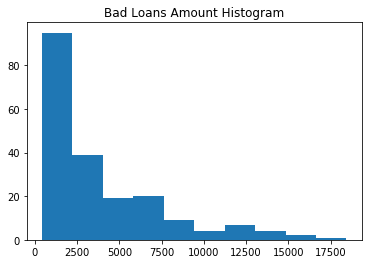

In [5]:
# Plot of bad loans and what their loan amount is
plt.hist(train_credit[train_credit['credit_risk']==0]['amount'])
plt.title('Bad Loans Amount Histogram')


In [6]:
#Dropping the ID feature as it does not help us
data = train_credit.copy()
data.drop(['Id'],inplace=True,axis=1)

In [7]:
#Dropping the target feature from the training but keeping it stored in another variable
X_full = data.drop('credit_risk',axis=1)
y_full = data['credit_risk']

In [8]:
#Splitting into training and test set
#large test size, to make sure the independence calcuation below is not just some fluke
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.5, random_state=42)

In [9]:
#training MLP algorithm on the data with 1000 iterations
MLP_MAX_ITER=10000
model = MLPClassifier(max_iter=MLP_MAX_ITER)
model.fit(X_train,y_train)
prediction = model.predict(X_test)

In [10]:
#Making a copy of what the machine learning predicted in a dataframe. 
#We also add if it was accurate or not by using the target feature we stored above
test_df = X_test.copy()
test_df['credit_risk'] = y_test
test_df['pred'] = pd.Series(prediction, index=test_df.index)
test_df['accurate'] = (test_df['pred'] == test_df['credit_risk'])
test_df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk,pred,accurate
696,4,6,2,2,4611,1,2,1,2,1,...,3,2,1,3,2,1,2,0,1,False
667,2,15,0,0,1778,1,2,2,2,1,...,3,1,2,1,2,1,2,0,1,False
63,4,15,2,3,1979,5,5,4,3,1,...,3,2,1,3,2,1,2,1,1,True
533,2,12,2,3,1092,1,3,4,2,3,...,3,2,2,3,2,2,2,1,1,True
66,4,15,4,2,1520,5,5,4,3,1,...,3,2,1,3,2,1,2,1,1,True


In [11]:
#Cross validates the data with a randomForest model
#Uses the cross_val_score and RepeatedStratifiedKFold modules from Sklearn library
def cross_validate(X = X_train,y = y_train):


    models = []
    models.append(('RF',RandomForestClassifier()))


    results = []
    names = []
    scoring ='accuracy'

    for name,model in models:
        kfold = RepeatedStratifiedKFold(n_splits=10,random_state=42,n_repeats=3)
        cv_results = cross_val_score(model,X,y,cv=kfold,scoring=scoring)
        results.append(cv_results)
        names.append(name)
        print (f'Model:{name},Mean: {cv_results.mean()},Std Dev: {cv_results.std()}')

In [12]:
cross_validate(X_train,y_train)

Model:RF,Mean: 0.7716666666666666,Std Dev: 0.048189440982669876


In [13]:
#Uses randint to set  the different parameters that randomforest use to random values in a given range
#To find which sets gives the best results
#The different modules used here are also from sklearn (RandomForestClassifier, RandomizedSearchCV)
param_distribs = {
        'n_estimators': randint(low=1, high=500),
        'max_depth': randint(low=1, high=10),
        'max_features':randint(low=1,high=10),
        
    }

rf_clf = RandomForestClassifier(random_state=42)
rnd_search = RandomizedSearchCV(rf_clf, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='accuracy', random_state=42)
rnd_search.fit(X_train,y_train)
rnd_search.best_params_

{'max_depth': 8, 'max_features': 5, 'n_estimators': 103}

In [14]:
#Uses the parameters that was found from the Rnd search
rf_clf = RandomForestClassifier(random_state=42, max_depth=8, max_features=8, n_estimators=131)
rf_clf.fit(X_train, y_train)
predictions_train_rf = rf_clf.predict(X_test)

In [15]:
#Printing the different measures of accuracy, we have so far.
print('Accuracy RForest: {}'.format(accuracy_score(y_test,predictions_train_rf)))
print('Precision RForest: {}'.format(precision_score(y_test,predictions_train_rf)))
print('Recall RForest: {}'.format(recall_score(y_test,predictions_train_rf)))
print('RandomForest_Confusion Matrix')
print(confusion_matrix(y_test,predictions_train_rf))

Accuracy RForest: 0.7725
Precision RForest: 0.8075801749271136
Recall RForest: 0.9172185430463576
RandomForest_Confusion Matrix
[[ 32  66]
 [ 25 277]]


In [16]:
#Calculating independence according to fairness book
#P{R=1 | A=a} = P{R=1 | A=b}
#P{credit_risk=1 | age<25} = P{credit_risk=1 | age > 25} 
#P{credit_risk=0 | age <25} = P{credit_risk=0 | age > 25}
#or at least within 80% of each other

#True positive for young people
tpY =  test_df.query("age < 25 & credit_risk==1 & accurate==True").shape[0]
print("True Positive(<25): people under 25 with good credit",tpY)
#False positive for young people
fpY = test_df.query("age < 25 & credit_risk==1 & accurate==False").shape[0]
print("False Positive(<25): people under 25 with good credit",fpY)

#True negative for young people
tnY = test_df.query("age < 25 & credit_risk==0 & accurate==True").shape[0]
print("True negative(<25): people under 25 with bad credit",tnY)
#False negative for young people
fnY  = test_df.query("age < 25 & credit_risk==0 & accurate==False").shape[0]
print("False negative(<25): people under 25 with bad credit",fnY)

#True Positive for older people
tpO = test_df.query("age > 25 & credit_risk==1 & accurate==True").shape[0]
print("True Positive(>25): people over 25 with good credit", tpO)
#False Positive for older people
fpO = test_df.query("age > 25 & credit_risk==1 & accurate==False").shape[0]
print("False Positive(>25): people over 25 with good credit", fpO)

#True Negative for older people
tnO = test_df.query("age > 25 & credit_risk==0 & accurate==True").shape[0]
print("True Negative(>25): people over 25 with bad credit", tnO)
#False Negative for older people
fnO = test_df.query("age > 25 & credit_risk==0 & accurate==False").shape[0]
print("False Negative(>25): people over 25 with bad credit",fnO)

#Total predicted negative younger people
pred_negY = test_df.query("age < 25 & credit_risk==0").shape[0]
print("Total predicted under 25 with bad credit:", pred_negY)

#Total predicted positive younger people
pred_posY = test_df.query("age < 25 & credit_risk==1").shape[0]
print("Total under 25 with good credit:", pred_posY)

#Total predicted negative older people
pred_negO = test_df.query("age > 25 & credit_risk==0").shape[0]
print("Total over 25 with bad credit:", pred_negO)

#Total predicted positive older people
pred_posO =  test_df.query("age > 25 & credit_risk==1").shape[0]
print("Total over 25 with good credit:", pred_posO)

print("Under 25 bad credit:", pred_negY, "predicted with bad credit out of", pred_posY+pred_negY, " = ", (pred_negY/(pred_posY+pred_negY)*100))
print("Under 25 good credit:", pred_posY, '/', pred_posY+pred_negY, '= ', (pred_posY/(pred_posY+pred_negY))*100, "%")
print("Over 25 bad credit:", pred_negO, '/', pred_posO+pred_negO, '= ', (pred_negO/(pred_posO+pred_negO))*100, "%")
print("Over 25 good credit:", pred_posO,'/', pred_posO+pred_negO,'= ', (pred_posO/(pred_posO+pred_negO))*100, "%")

True Positive(<25): people under 25 with good credit 40
False Positive(<25): people under 25 with good credit 0
True negative(<25): people under 25 with bad credit 0
False negative(<25): people under 25 with bad credit 18
True Positive(>25): people over 25 with good credit 253
False Positive(>25): people over 25 with good credit 0
True Negative(>25): people over 25 with bad credit 0
False Negative(>25): people over 25 with bad credit 72
Total predicted under 25 with bad credit: 18
Total under 25 with good credit: 40
Total over 25 with bad credit: 72
Total over 25 with good credit: 253
Under 25 bad credit: 18 predicted with bad credit out of 58  =  31.03448275862069
Under 25 good credit: 40 / 58 =  68.96551724137932 %
Over 25 bad credit: 72 / 325 =  22.153846153846153 %
Over 25 good credit: 253 / 325 =  77.84615384615384 %


From indepence calculation here where there is a more than 80% likeness between the features we can not conclude that whether you are above or below 25 will affect whether you are classified as a high credit risk or not. 